In [285]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn import tree, ensemble
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_colwidth', 200)

<br>

In [286]:
data_description = pd.read_csv("./cols_data_specs.csv")
data_col_fixed = ['label']; data_col_fixed.extend(data_description.sort_values("specification").iloc[:,1])
data_description

specification             variable  \
0        tipsbp10-PC_GDP_3Y-NSA-CA-BAL-WRL_REST         PC_CA-avg_3y   
1                               tipser10-PCH_1Y          REER-pch_1y   
2                               tipser10-PCH_3Y          REER-pch_3y   
3            tipsex10-PCH_WRL_5Y-G-CRE-WRL_REST   X_G_share_M-pch_5y   
4           tipsex10-PCH_WRL_5Y-GS-CRE-WRL_REST  X_GS_share_M-pch_5y   
5            tipsex10-PCH_WRL_5Y-S-CRE-WRL_REST   X_S_share_M-pch_5y   
6               tipsfs10-F-NCO-S12-LIAB-MIO_NAC              FSL-mil   
7               tipsfs10-F-NCO-S12-LIAB-PCH_PRE              FSL-pch   
8                tipsfs10-F-NCO-S12-LIAB-PC_GDP           FSL-pc_gdp   
9                       tipsgo10-GD-S13-MIO_NAC               GD-mil   
10                       tipsgo10-GD-S13-PC_GDP            GD-pc_gdp   
11                           tipsho10-INX_A_AVG              HPI-pch   
12                           tipsho10-RCH_A_AVG            HPI-index   
13  tipsii10-NSA-FA-S1-S1-N_LE-WRL_REST-MIO_NAC             NIIP-mil   
14   tipsii10-NSA-FA-S1-S1-N_LE-WRL_REST-PC_GDP          NIIP-pc_gdp   
15                     tipslm10-NULC_PER-PCH_3Y           ULC-pch_3y   
16                            tipslm60-T-PC_POP           ACT-pc_pop   
17                           tipslm60-T-PPCH_3Y           ACT-pch_3y   
18                            tipslm70-PC_ACT-T           LTU-pc_pop   
19                           tipslm70-PPCH_3Y-T           LTU-pch_3y   
20                     tipslm80-Y_LT25-T-PC_ACT           YUR-pc_act   
21                    tipslm80-Y_LT25-T-PPCH_3Y           YUR-pch_3y   
22   tipspc20-CO-S11_S14_S15-LIAB-F3_F4-MIO_NAC             PSCF-mil   
23    tipspc20-CO-S11_S14_S15-LIAB-F3_F4-PC_GDP          PSCF-pc_gdp   
24   tipspd20-CO-S11_S14_S15-LIAB-F3_F4-MIO_NAC              PSD-mil   
25    tipspd20-CO-S11_S14_S15-LIAB-F3_F4-PC_GDP           PSD-pc_gdp   
26                      tipsun10-TOTAL-AVG_3Y-T            UR-avg_3y   

                                                                          description  \
0                                           Current account balance - 3 year average    
1       Real effective exchange rate (42 trading partners based on HICP/CPI) - 1y pch   
2       Real effective exchange rate (42 trading partners based on HICP/CPI) - 3y pch   
3                                           G Export market shares - 5 years % change   
4                                          GS Export market shares - 5 years % change   
5                                           G Export market shares - 5 years % change   
6        Total financial sector liabilities non-consolidated - annual data - millions   
7       Total financial sector liabilities non-consolidated - annual data - 1y change   
8          Total financial sector liabilities non-consolidated - annual data - pc gdp   
9   General government gross debt (EDP concept) consolidated - annual data - millions   
10    General government gross debt (EDP concept) consolidated - annual data - pc gdp   
11                                    House price index deflated - annual data - pch    
12                                   House price index deflated - annual data - index   
13                     Net international investment position - annual data - millions   
14                       Net international investment position - annual data - pc gdp   
15                                        Nominal unit labour cost - 3 years % change   
16                          Activity rate - % of total population aged 15-64 - pc pop   
17                          Activity rate - % of total population aged 15-64 - pch 3y   
18             Long-term unemployment rate % of active population aged 15-74 - pc pop   
19             Long-term unemployment rate % of active population aged 15-74 - pch 3y   
20               Youth unemployment rate - % of active population aged 15-24 - pc act   
21               Youth unemployment rate - % of active popu

<br>

In [294]:
data_description.iloc[:,-1].value_counts()

headline     14
auxiliary    13
Name: type_var, dtype: int64

In [295]:
data = pd.read_csv("./data.csv", index_col=0)
data = data[sorted(data.columns)]
data.columns = data_col_fixed
data = data[["label"]+list(data_description.variable.values)]#list(data_description[data_description.type_var == "headline"].variable.values)]
data.to_csv("./dataset.csv")

In [296]:
data.loc[data.label == 0,["label"]] = 1

In [297]:
data.iloc[(np.r_[0:6, -6:0])]

label  PC_CA-avg_3y  REER-pch_3y  X_GS_share_M-pch_5y  FSL-pch  \
2011_AT      1           2.4         -1.8               -12.46      1.5   
2011_BE      2          -0.1         -1.5                -7.63      5.4   
2011_CZ      1          -2.6         -0.5                 7.43      4.3   
2011_DE      1           5.8         -4.8                -9.09      2.9   
2011_DK      2           5.5         -2.5               -13.75      1.6   
2011_EE      1           1.9         -0.8                24.29     -0.2   
2017_PT      2           0.4         -0.7                14.62      1.8   
2017_RO      1          -2.2         -5.5                37.02      8.1   
2017_SE      2           3.7         -5.4                -4.36      6.8   
2017_SI      1           5.7         -2.0                18.64      5.1   
2017_SK      1          -2.0         -1.9                 6.67     17.9   
2017_UK      1          -4.5        -10.7                -0.98     -1.7   

         GD-pc_gdp  HPI-pch  NIIP-pc_gdp  ULC-pch_3y  ACT-pch_3y  LTU-pch_3y  \
2011_AT       82.4    88.41         -1.9         5.8         0.7         0.2   
2011_BE      102.6    99.49         60.9         5.3        -0.4         0.2   
2011_CZ       39.8    98.86        -45.2         3.4         0.8         0.5   
2011_DE       78.6    90.32         23.2         5.7         1.4        -1.1   
2011_DK       46.1    92.83         27.8         3.6        -1.4         1.3   
2011_EE        6.1    74.86        -54.8        -2.6         0.5         5.4   
2017_PT      124.8   114.39       -104.9         3.5         1.5        -3.9   
2017_RO       35.1   108.67        -47.8        13.5         1.6        -0.8   
2017_SE       40.8   112.54          4.4         3.8         1.0        -0.2   
2017_SI       74.1   110.24        -32.3         3.4         3.3        -2.2   
2017_SK       50.9   111.76        -65.6         6.9         1.8        -4.2   
2017_UK       87.4   107.92         -8.1         5.3         0.9        -1.1   

         YUR-pch_3y  PSCF-pc_gdp  PSD-pc_gdp  UR-avg_3y  
2011_AT         0.4          3.0       129.4        4.9  
2011_BE         0.7         21.7       181.5        7.8  
2011_CZ         8.2          2.1        68.3        6.9  
2011_DE        -1.9          1.6       102.5        6.8  
2011_DK         6.2          4.4       221.0        7.0  
2011_EE        10.4         -1.1       120.4       14.2  
2017_PT       -10.9          1.3       162.2       10.9  
2017_RO        -5.7          1.7        51.0        5.9  
2017_SE        -5.1         13.1       194.4        7.0  
2017_SI        -9.0          0.8        75.6        7.9  
2017_SK       -10.8          5.9        96.1        9.8  
2017_UK        -4.9          8.2       171.5        4.8

<br>

In [319]:
data["PC_CA-avg_3y"]=data["PC_CA-avg_3y"].abs()
data["REER-pch_3y"]=data["REER-pch_3y"].abs()

In [299]:
data[data["PC_CA-avg_3y"]<-4][["PC_CA-avg_3y","label"]]

PC_CA-avg_3y  label
2011_EL         -11.2      4
2011_MT          -5.6      1
2011_PL          -4.8      1
2011_PT          -8.9      4
2011_RO          -4.9      4
2011_SK          -4.4      1
2012_EL          -8.4      4
2012_PL          -4.8      1
2012_PT          -6.0      4
2012_RO          -5.0      4
2013_CY          -5.0      4
2013_EL          -5.3      4
2014_CY          -5.1      4
2014_UK          -4.6      2
2015_UK          -5.0      1
2016_UK          -5.0      1
2017_CY          -5.0      3
2017_UK          -4.5      1

In [300]:
data[data["PC_CA-avg_3y"]>6][["PC_CA-avg_3y","label"]]

PC_CA-avg_3y  label
2011_LU           6.6      1
2011_NL           7.0      1
2012_DE           6.2      1
2012_DK           6.5      2
2012_LU           6.1      1
2012_NL           8.6      2
2013_DE           6.6      2
2013_DK           6.9      1
2013_NL           9.5      2
2014_DE           7.1      2
2014_DK           7.7      1
2014_NL           9.5      2
2015_DE           7.7      2
2015_DK           8.3      1
2015_NL           8.2      2
2016_DE           8.3      2
2016_DK           8.4      1
2016_NL           7.6      2
2017_DE           8.5      2
2017_DK           8.0      1
2017_NL           8.3      2

In [320]:
np.percentile(data[data.index.str[:4]=="2016"]["PSD-pc_gdp"].values, 0.75)

55.6975

In [321]:
data[data.index.str[:4]=="2016"]["PSD-pc_gdp"].quantile([0.25,0.5,0.75])

0.25     89.25
0.50    121.50
0.75    179.10
Name: PSD-pc_gdp, dtype: float64

In [322]:
def UnderOverSample(choice, df):
    output = pd.DataFrame()
    if choice == "under":
        under_count = df.label.value_counts().min()
        for i in df.label.value_counts().index.values:
            output = pd.concat([output,  df[df.label == i].sample(under_count)], axis=0)
    elif choice == "over":
        over_count = df.label.value_counts().max()
        for i in df.label.value_counts().index.values:
            output = pd.concat([output,  df[df.label == i].sample(over_count, replace=True)], axis=0)
    
    return(output, output.iloc[:,output.columns!="label"], output.label)

In [323]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size = 0.30, random_state = 0, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_sm, columns=list(data.columns[1:])), pd.DataFrame(y_sm, columns=["label"]), test_size = 0.2, random_state = 42, shuffle=True)
train, X_train, y_train = UnderOverSample("over", pd.concat([X_train, y_train], axis=1))
test = pd.concat([X_test, y_test], axis = 1)

In [324]:
# Categoria dos dados

In [325]:
catss = ["0+1: No In-depth review + No Imbalance","2: Imbalance","3: Excessive Imbalance","4: Programme countries"]
pd.DataFrame(data.label.value_counts().sort_index().values, index=catss, columns=["Count Entire Dataset"])

Count Entire Dataset
0+1: No In-depth review + No Imbalance                    84
2: Imbalance                                              64
3: Excessive Imbalance                                    25
4: Programme countries                                    17

In [326]:
catss = ["0+1: No In-depth review + No Imbalance","2: Imbalance","3: Excessive Imbalance","4: Programme countries"]
pd.DataFrame(y_test.value_counts().sort_index().values, index=catss, columns=["Count Test  set"])

Count Test  set
0+1: No In-depth review + No Imbalance               21
2: Imbalance                                         19
3: Excessive Imbalance                               10
4: Programme countries                                7

In [327]:
catss = ["0+1: No In-depth review + No Imbalance","2: Imbalance","3: Excessive Imbalance","4: Programme countries"]
pd.DataFrame(y_train.value_counts().sort_index().values, index=catss, columns=["Count Trainning set (over-sampling)"])

Count Trainning set (over-sampling)
0+1: No In-depth review + No Imbalance                                   63
2: Imbalance                                                             63
3: Excessive Imbalance                                                   63
4: Programme countries                                                   63

______________

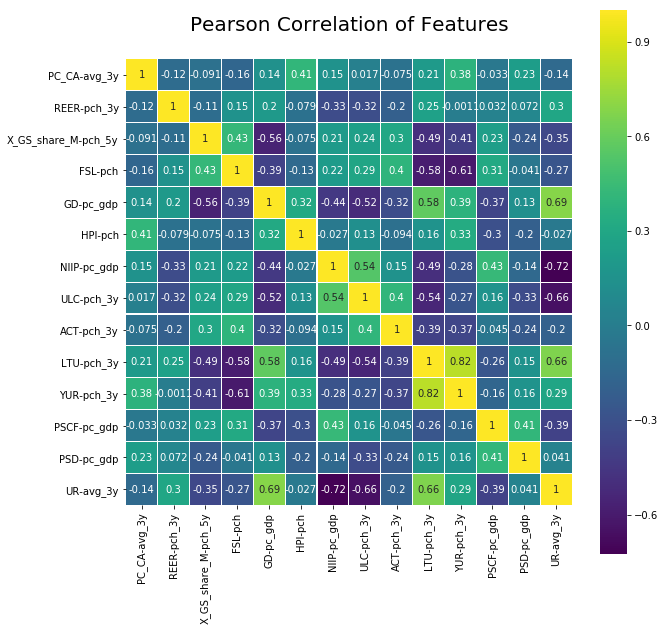

In [328]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [331]:
def average_accuracies(depth_max, times, data):

    
    # Testing max_depths from 1 to max attributes
    # Uncomment prints for details about each Cross Validation pass
    df = pd.DataFrame({"Max Depth": range(1,depth_max+1)})
    for test_size in [0.2,0.25,0.3,0.35,0.4]:
        accuracies = list()
        for depth in range(1,depth_max+1):
            fold_accuracy = []
            for time in range(times):
                X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size = test_size, shuffle=True)#True)
                #X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_sm, columns=list(data.columns[1:])), pd.DataFrame(y_sm, columns=["label"]), test_size = 0.2, random_state = 42, shuffle=True)
                train, X_train, y_train = UnderOverSample("over", pd.concat([X_train, y_train], axis=1))
                test = pd.concat([X_test, y_test], axis = 1)
                
                #fold_accuracy.append(accuracy_score(y_test, tree.DecisionTreeClassifier(max_depth = depth).fit(X_train, y_train).predict(X_test)))
                fold_accuracy.append(accuracy_score(y_test, ensemble.RandomForestClassifier(max_depth = depth, n_estimators=100).fit(X_train, y_train).predict(X_test)))
        
                
            avg = sum(fold_accuracy)/len(fold_accuracy)
            accuracies.append(avg)
            # print("Accuracy per fold: ", fold_accuracy, "\n")
            # print("Average accuracy: ", avg)
        print("Test size: "+str(test_size*100)+"%")
        df["Test size: "+str(test_size*100)+"%"] = accuracies
    return df.set_index("Max Depth")

In [335]:
plot_averages = average_accuracies(10,10,data)

Test size: 20.0%
Test size: 25.0%
Test size: 30.0%
Test size: 35.0%
Test size: 40.0%


_____

In [336]:
plot_averages

Test size: 20.0%  Test size: 25.0%  Test size: 30.0%  \
Max Depth                                                         
1                  0.518421          0.520833          0.519298   
2                  0.607895          0.568750          0.584211   
3                  0.642105          0.612500          0.571930   
4                  0.684211          0.608333          0.661404   
5                  0.726316          0.691667          0.700000   
6                  0.707895          0.679167          0.710526   
7                  0.750000          0.720833          0.698246   
8                  0.718421          0.702083          0.712281   
9                  0.755263          0.702083          0.691228   
10                 0.715789          0.677083          0.714035   

           Test size: 35.0%  Test size: 40.0%  
Max Depth                                      
1                  0.514925          0.515789  
2                  0.600000          0.623684  
3                  0.617910          0.602632  
4                  0.634328          0.643421  
5                  0.650746          0.660526  
6                  0.674627          0.676316  
7                  0.704478          0.694737  
8                  0.688060          0.701316  
9                  0.698507          0.684211  
10                 0.710448          0.657895

In [241]:
plot_averages

Test size: 20.0%  Test size: 25.0%  Test size: 30.0%  \
Max Depth                                                         
1                  0.335789          0.364583          0.374211   
2                  0.427895          0.430000          0.434561   
3                  0.513158          0.516042          0.520702   
4                  0.559211          0.564375          0.572632   
5                  0.587105          0.597083          0.576140   
6                  0.599474          0.592708          0.594211   
7                  0.608421          0.604583          0.591404   
8                  0.621053          0.607500          0.590526   
9                  0.620000          0.585833          0.588246   
10                 0.612632          0.588958          0.601754   

           Test size: 35.0%  Test size: 40.0%  
Max Depth                                      
1                  0.384627          0.383158  
2                  0.435821          0.439737  
3                  0.508507          0.527895  
4                  0.550299          0.548158  
5                  0.576716          0.578947  
6                  0.581045          0.578421  
7                  0.586418          0.588553  
8                  0.585373          0.581974  
9                  0.601343          0.575789  
10                 0.599552          0.595658

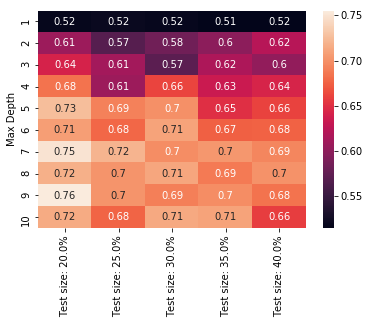

In [337]:
sns.heatmap(plot_averages, annot=True)

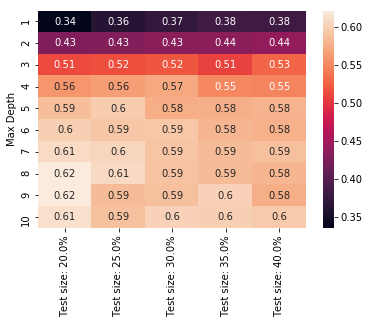

In [242]:
sns.heatmap(plot_averages, annot=True)

_____

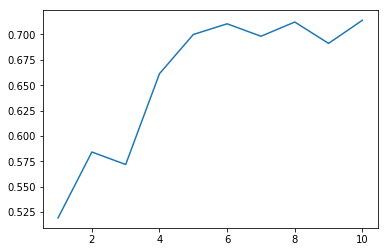

In [338]:
plt.plot(plot_averages.index,plot_averages.iloc[:,2])

In [311]:
# Create Decision Tree with max_depth = 3
decision_tree = ensemble.RandomForestClassifier(max_depth = 3)#tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, y_train)

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [312]:
# Predicting results for test dataset
y_pred = decision_tree.predict(X_test)

In [313]:
accuracy_score(y_test, y_pred)

0.5614035087719298

In [314]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.67      0.70        21
           2       0.64      0.47      0.55        19
           3       0.29      0.40      0.33        10
           4       0.50      0.71      0.59         7

   micro avg       0.56      0.56      0.56        57
   macro avg       0.54      0.56      0.54        57
weighted avg       0.60      0.56      0.57        57



<br>

Confusion matrix:
 [[14  3  3  1]
 [ 3  9  5  2]
 [ 2  2  4  2]
 [ 0  0  2  5]]


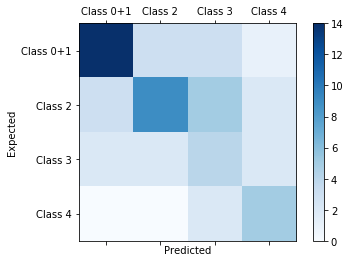

In [315]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0+1', 'Class 2', 'Class 3', 'Class 4']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

<br>

In [317]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(train.drop(['label'], axis=1)),
                              class_names = ["0+1", "2", "3", "4"],
                              rounded = True,
                              filled= True )

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

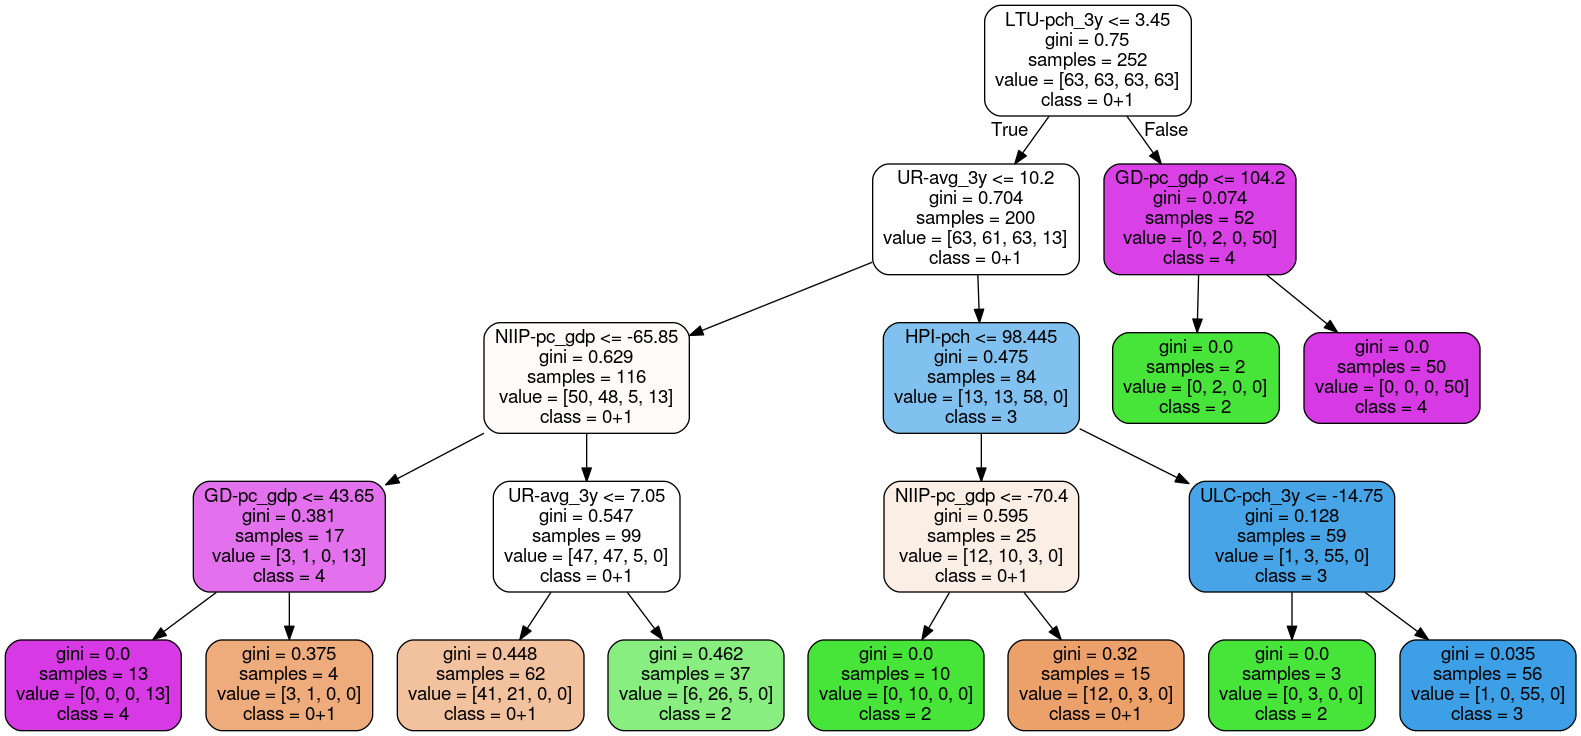

In [318]:
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
img.save('sample-out.png')
PImage("sample-out.png")

# Code to check available fonts and respective paths
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

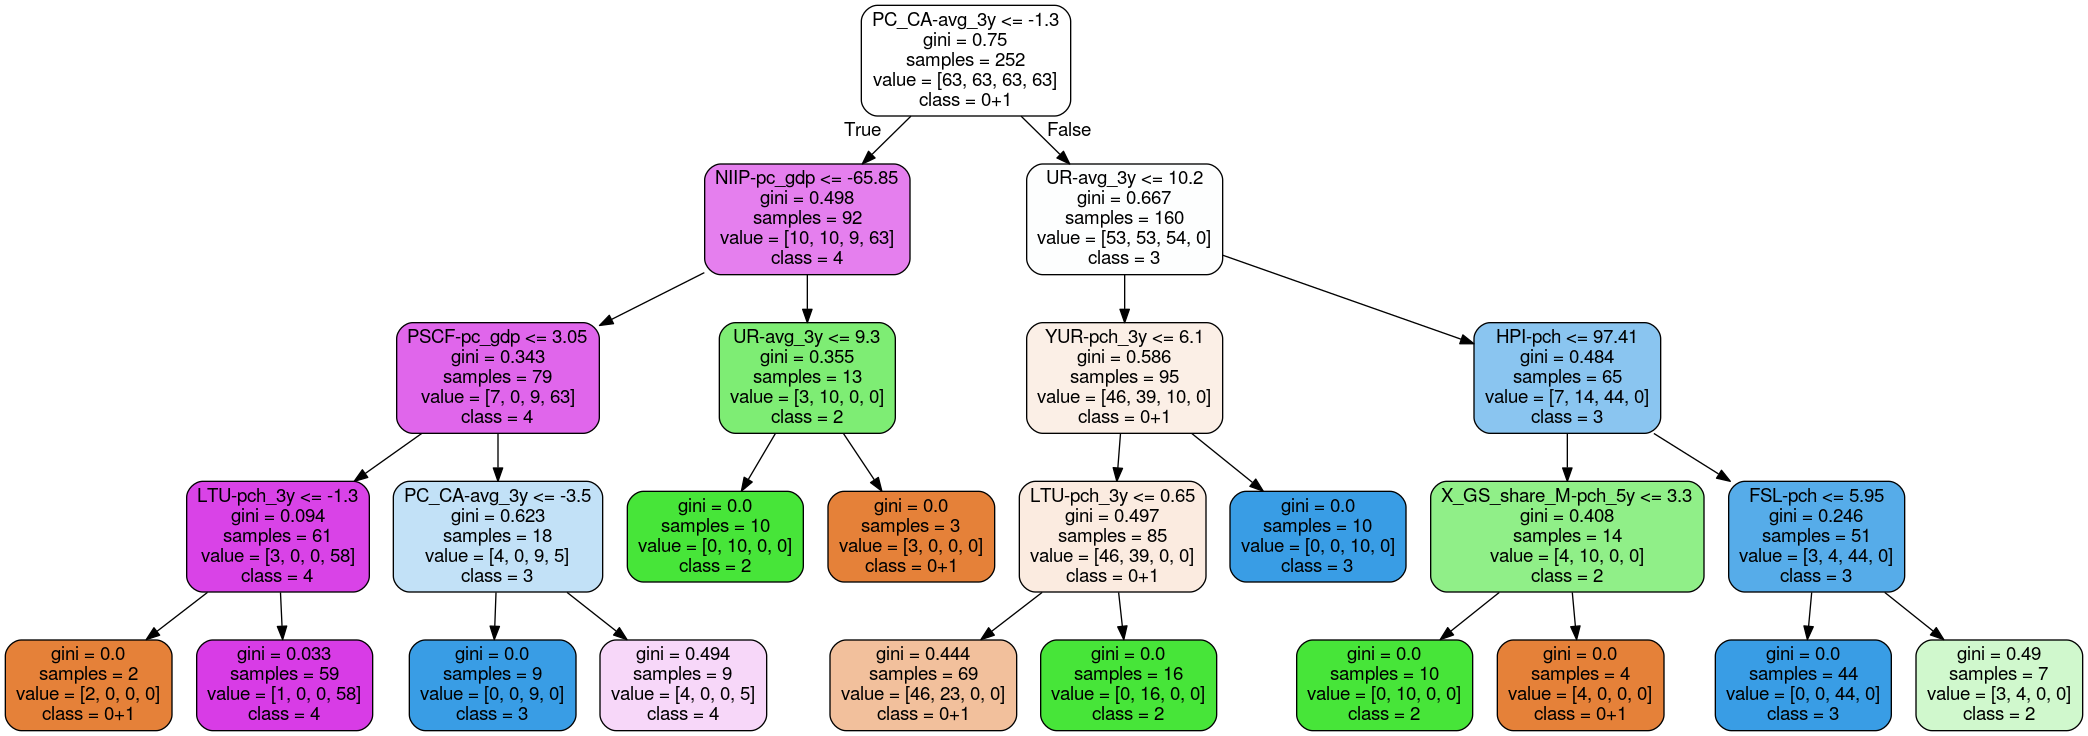

In [250]:
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
img.save('sample-out.png')
PImage("sample-out.png")

# Code to check available fonts and respective paths
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

<br>

****

In [251]:
out = X_test.copy()
out["country"] = out.index.str[-2:]
out["label_value"] = y_test
out["score"] = y_pred

In [252]:
out

PC_CA-avg_3y  REER-pch_3y  X_GS_share_M-pch_5y  FSL-pch  GD-pc_gdp  \
2015_BE          -0.7         -1.6               -11.88      2.7      106.5   
2013_RO          -3.6          0.5                13.74      0.8       37.6   
2016_UK          -5.0          0.2                 1.03     11.7       87.9   
2014_LT           0.9          1.7                33.65     16.2       40.5   
2015_LT           0.6          4.3                14.89      7.0       42.6   
2013_NL           9.5          0.5               -11.36     -0.5       67.7   
2011_PL          -4.8        -11.4                15.17      4.8       54.1   
2015_LU           5.2         -0.6                28.72     45.8       22.2   
2016_EL          -1.4         -4.0               -11.12    -16.6      178.5   
2011_ES          -3.8         -2.5                -8.56      3.0       69.5   
2011_EE           1.9         -0.8                24.29     -0.2        6.1   
2017_SI           5.7         -2.0                18.64      5.1       74.1   
2016_PT           0.3         -1.8                 5.54     -0.3      129.2   
2017_DK           8.0         -2.1                 0.50      3.9       36.1   
2017_RO          -2.2         -5.5                37.02      8.1       35.1   
2015_DK           8.3         -1.6                -8.50     -1.0       39.9   
2012_IE          -2.1        -12.2               -18.34     -1.8      119.9   
2013_IT          -0.8          0.1               -20.20     -2.7      129.0   
2016_BE          -0.8         -0.3                -2.34      2.4      106.1   
2015_SE           4.7         -8.2                -9.33      2.4       44.2   
2013_DE           6.6         -1.8               -12.42     -6.2       77.4   
2014_PT           0.0         -1.8                -6.13     -7.5      130.6   
2015_UK          -5.0         10.8                 2.00     -8.5       87.9   
2017_LV           0.6          1.7                 7.77      6.1       40.0   
2017_EL          -1.4         -2.8                -1.29    -12.9      176.1   
2016_LT           0.0          5.3                 5.14     16.6       39.9   
2013_HR           0.0         -3.9               -23.32      2.8       80.4   
2013_ES          -0.6         -0.3               -11.22    -10.5       95.5   
2015_ES           1.3         -3.1                -4.04     -1.6       99.3   
2012_ES          -2.4         -5.3               -18.24      2.9       85.7   
2011_DK           5.5         -2.5               -13.75      1.6       46.1   
2013_CZ          -1.4         -3.0                -9.79     11.4       44.9   
2014_IT           0.9          0.2               -15.28      0.6      131.8   
2012_PL          -4.8          1.4                 1.39     10.7       53.7   
2012_PT          -6.0         -4.0               -16.64     -3.0      126.2   
2012_BE           0.2         -4.3               -15.55     -5.1      104.3   
2017_IE           2.9         -6.2                68.60      4.3       68.4   
2016_CY          -3.6         -7.4                -2.05      1.8      105.5   
2015_CZ           0.0         -8.0                -2.17      8.1       40.0   
2011_FI           0.3         -2.8               -23.46     28.8       48.5   
2014_UK          -4.6         10.1                -9.62      4.8       87.0   
2014_FI          -2.1          2.7               -26.38      9.2       60.2   
2014_FR          -0.8         -1.3               -14.52      5.6       94.9   
2017_ES           1.8         -2.5                 9.79      4.1       98.1   
2017_FR          -0.6         -2.9                 2.69      4.3       98.5   
2015_BG           0.8         -4.2                11.80      6.2       26.2   
2011_UK          -3.0         -7.8               -25.70     10.4       80.8   
2012_DK           6.5         -7.8               -17.73      2.5       44.9   
2016_DK           8.4         -1.7                -2.85      5.4       37.9   
2013_FI          -2.1          0.2               -31.44    

In [253]:
set(out.score)

{1, 2, 3, 4}

In [254]:
for i in set(out.score):
    temp_out = out.copy()
    for cat in ["score", "label_value"]:
        temp_out.loc[temp_out[cat]==i,cat] = "one"
        temp_out.loc[temp_out[cat]!="one",cat] = "zero"
        temp_out.loc[temp_out[cat]=="one",cat] = 1
        temp_out.loc[temp_out[cat]=="zero",cat] = 0
    temp_out.to_csv("bias/testing_"+str(i)+".csv", index=False)